In [14]:
import pandas as pd

#Task 1- Load Data File
df = pd.read_csv('owid-covid-data.csv')

#a few tasks to check data structure
print('This are the columns:\n', df.columns)
print('\nThis is the head command:\n', df.head())
print('\nThe NULL command\n', df.isnull().sum())

This are the columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinatio

In [67]:
#Task 2- DATA CLEANING
countries = ['Kenya','China','India',]
df = df[df['location'].isin(countries)]
#print ('SELECTED Countries', df)

#drop rows
print("Before:", len(df))
df = df.dropna(subset=['date', 'total_cases'])
print("After:", len(df))

#convert the date column
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

#handling missing values
df['total_deaths'] = df['total_deaths'].fillna(0)
df['new_cases'] = df['new_cases'].interpolate()
print(df[['total_deaths', 'new_cases']].isnull().sum())


#CLEAN OUTPUT
print(df.head(10))

Before: 5022
After: 5022
datetime64[ns]
total_deaths    0
new_cases       0
dtype: int64
      iso_code continent location       date  total_cases  new_cases  \
73670      CHN      Asia    China 2020-01-05          1.0        1.0   
73671      CHN      Asia    China 2020-01-06          1.0        0.0   
73672      CHN      Asia    China 2020-01-07          1.0        0.0   
73673      CHN      Asia    China 2020-01-08          1.0        0.0   
73674      CHN      Asia    China 2020-01-09          1.0        0.0   
73675      CHN      Asia    China 2020-01-10          1.0        0.0   
73676      CHN      Asia    China 2020-01-11          1.0        0.0   
73677      CHN      Asia    China 2020-01-12         45.0       44.0   
73678      CHN      Asia    China 2020-01-13         45.0        0.0   
73679      CHN      Asia    China 2020-01-14         45.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
73670                 NaN           0

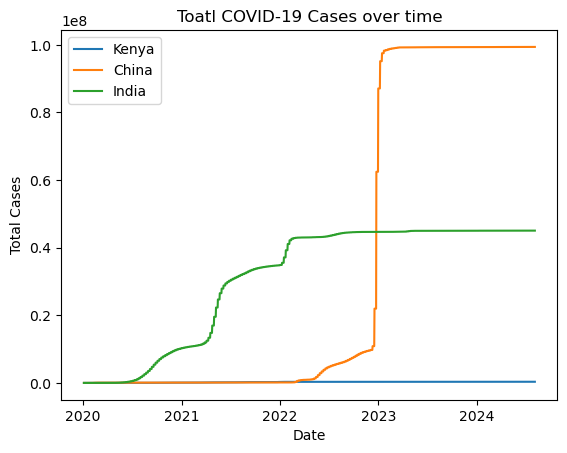

<function matplotlib.pyplot.show(close=None, block=None)>

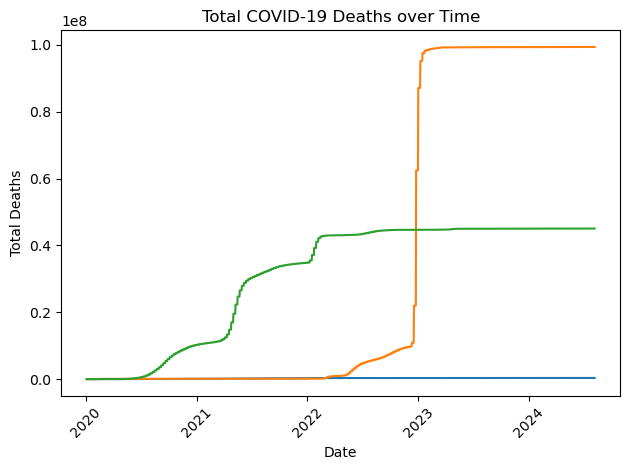

In [68]:
#TASK 4: Expolre Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

#LINE CHART: plot Total cases over time
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'],country_data['total_cases'], label= country)
plt.legend()
plt.title("Toatl COVID-19 Cases over time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

#death rate
#df['death_rate'] = df['total_deaths']/df['total_cases']

#LINE CHART: Plot Total death over Time
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'],country_data['total_cases'], label = country)
plt.title('Total COVID-19 Deaths over Time')
plt.legend
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show



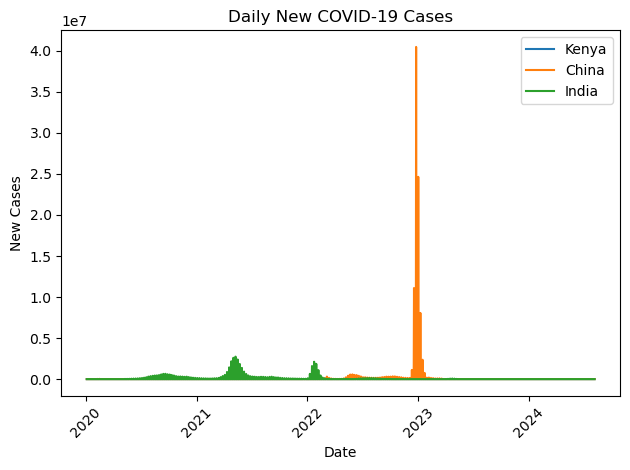

In [69]:
#LINE CHART 3: Plot to compare Daily new cases btwn Countries
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

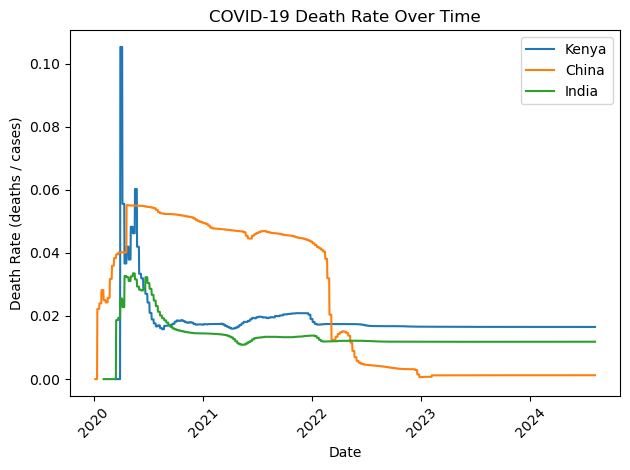

In [71]:
#calculate and plot the death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (deaths / cases)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

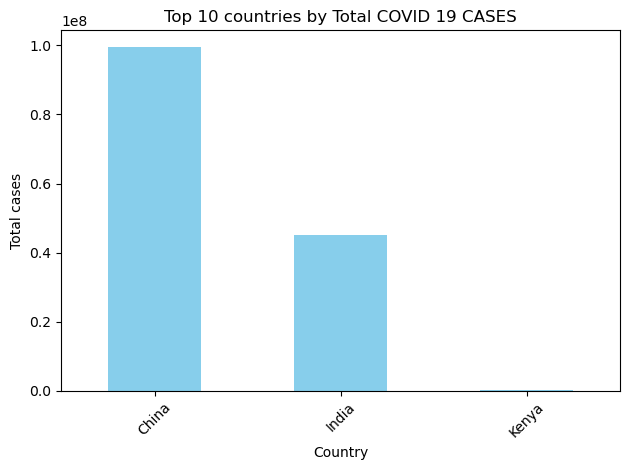

In [72]:
#Compare Top countries and Total cases recorded
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]
top_countries = latest_data.groupby('location')['total_cases'].max().sort_values(ascending=False)

top_countries.plot(kind= 'bar', color= 'skyblue')
plt.title('Top 10 countries by Total COVID 19 CASES')
plt.xlabel('Country')
plt.ylabel('Total cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

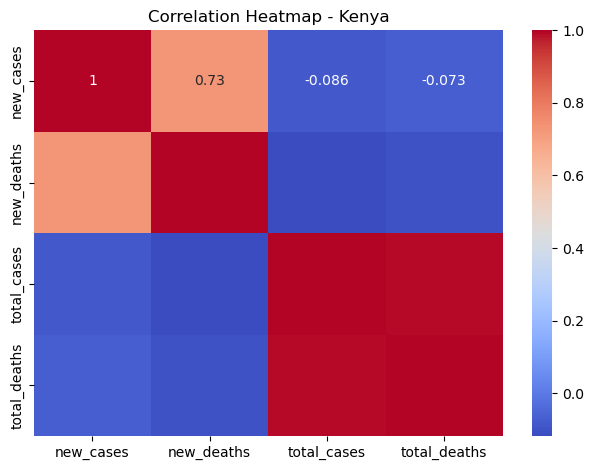

In [73]:
import seaborn as sns

# Filter one country for heatmap clarity (e.g., Kenya)
kenya_data = df[df['location'] == 'Kenya'][['new_cases', 'new_deaths', 'total_cases', 'total_deaths']]
sns.heatmap(kenya_data.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap - Kenya')
plt.tight_layout()
plt.show()

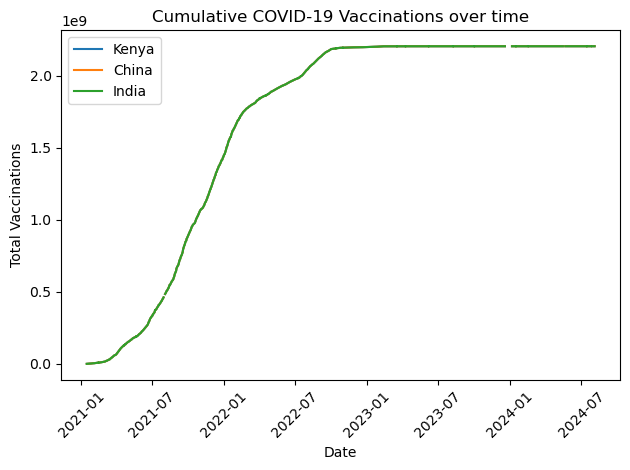

In [75]:
#TASK 5:  Visualizing Vaccination Progress
#Compares cumulative vaccinations over time

for country in countries:
    country_dat = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations over time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

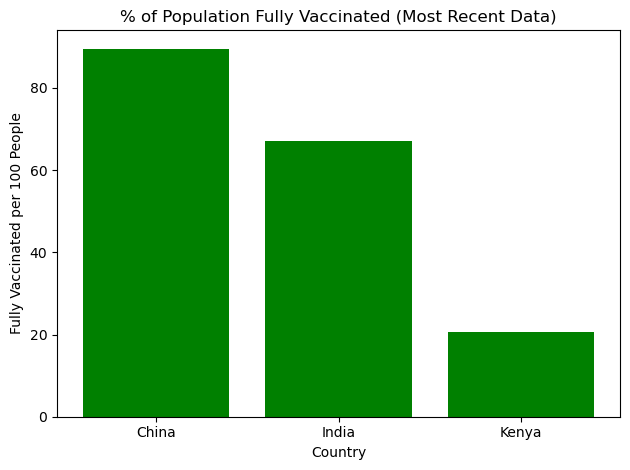

In [76]:

# Get the latest available vaccination data per country
vax_summary = df[df['location'].isin(countries)]
vax_latest = vax_summary.sort_values('date').groupby('location').last().reset_index()

# Drop countries where data is missing
vax_latest = vax_latest[['location', 'people_fully_vaccinated_per_hundred']].dropna()

# Plot bar chart
plt.bar(vax_latest['location'], vax_latest['people_fully_vaccinated_per_hundred'], color='green')
plt.title('% of Population Fully Vaccinated (Most Recent Data)')
plt.ylabel('Fully Vaccinated per 100 People')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


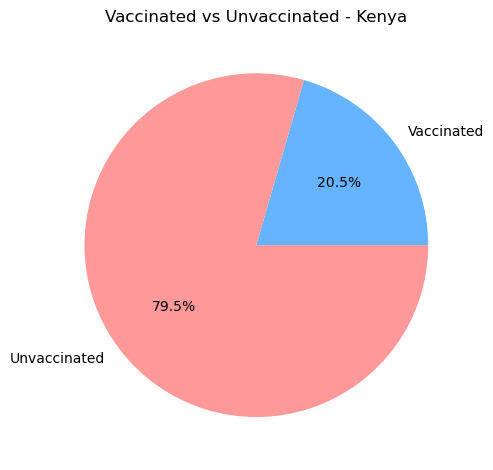

In [77]:
#PIE CHART plot for vaccinated and unvaccinated individuals in KENYA
country = 'Kenya'
country_df = df[df['location'] == country].sort_values('date')
kenya_latest = country_df.dropna(subset=['people_fully_vaccinated_per_hundred']).iloc[-1:]

if not kenya_latest.empty:
    vaccinated = kenya_latest['people_fully_vaccinated_per_hundred'].values[0]
    unvaccinated = 100 - vaccinated

    plt.pie(
        [vaccinated, unvaccinated],
        labels=['Vaccinated', 'Unvaccinated'],
        colors=['#66b3ff', '#ff9999'],
        autopct='%1.1f%%'
    )
    plt.title(f'Vaccinated vs Unvaccinated - {country}')
    plt.tight_layout()
    plt.show()
else:
    print(f"No vaccination data available for {country}.")


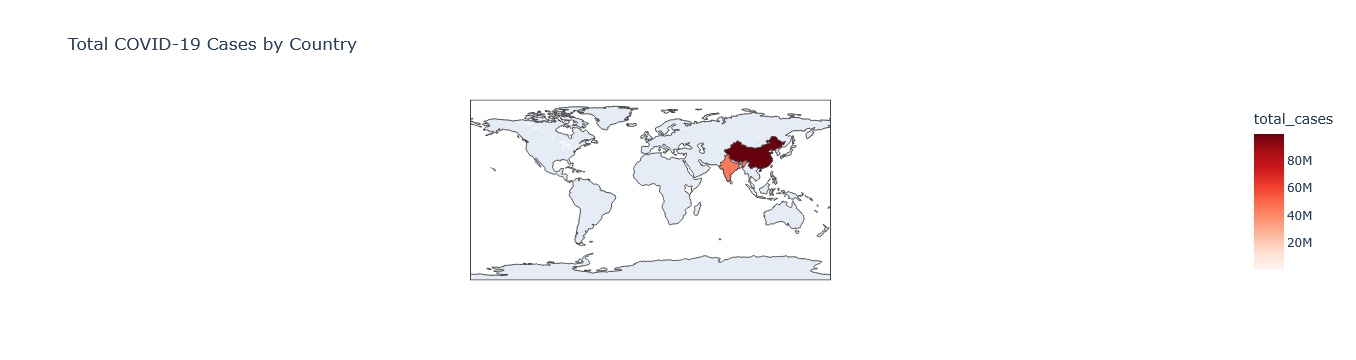

In [78]:
#TASK 6: CHOROPLETH MAP
import plotly.express as px

# Prepare latest data
latest_map = df[df['date'] == df['date'].max()]

# Drop rows with missing values
map_data = latest_map[['iso_code', 'location', 'total_cases']].dropna()

# Plot
fig = px.choropleth(map_data,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale='Reds',
                    title='Total COVID-19 Cases by Country')
fig.show()


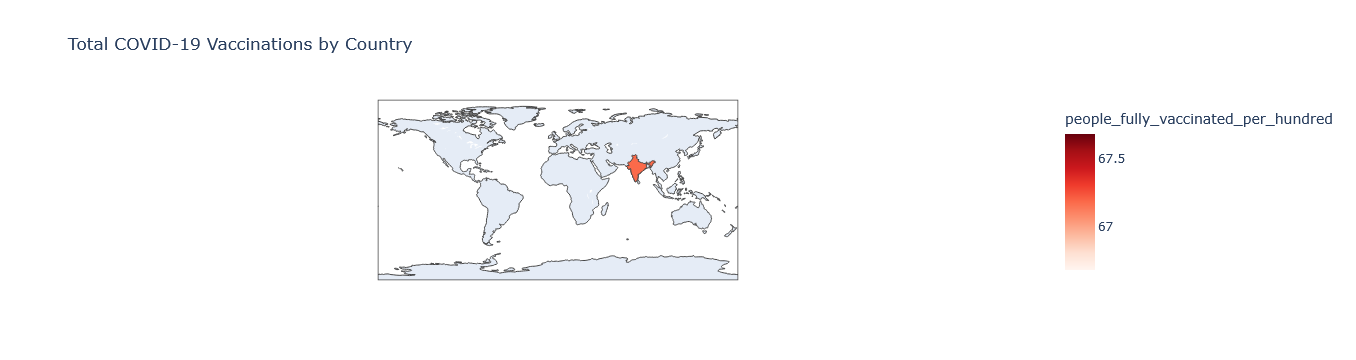

In [79]:
#TASK 6: CHOROPLETH MAP
import plotly.express as px

# Prepare latest data
latest_map = df[df['date'] == df['date'].max()]

# Drop rows with missing values
map_data = latest_map[['iso_code', 'location', 'people_fully_vaccinated_per_hundred']].dropna()

# Plot
fig = px.choropleth(map_data,
                    locations='iso_code',
                    color='people_fully_vaccinated_per_hundred',
                    hover_name='location',
                    color_continuous_scale='Reds',
                    title='Total COVID-19 Vaccinations by Country')
fig.show()


In [83]:
df['location'].unique()
df[df['location'].isin(['Kenya', 'China', 'India'])].groupby('location')['date'].max()
df[df['location'].isin(['Kenya', 'China', 'India'])].sort_values(['location', 'date']).groupby('location').tail(1)[['location', 'date', 'people_fully_vaccinated_per_hundred']]
#Confirmation that KENYA and CHINA have no records in this section

,location,date,people_fully_vaccinated_per_hundred
75343,China,2024-08-04,NaN
175222,India,2024-08-04,67.18
196995,Kenya,2024-08-04,NaN


## KEY INSIGHTS & REPORTING (Kenya, China, India)
1. China had the highest vaccination rollout overall
   Its cumulative vaccination curve rises rapidly compared to Kenya and India.
   
2. India showed strong momentum after a delayed start
   India initially trailed behind China in early vaccination progress but caught up significantly as the curve shows a sharp upward trajectory after mid-2021

3. Kenya lagged in vaccination rollout
   Kenya’s vaccination curve remained flat for much of 2021, with noticeable increases only in late 2021 and early 2022.

4. Full vaccination rates (%) show stark disparities
China had a very high fully vaccinated rate, often exceeding 80%.
India followed with around 50–70%, depending on the date you visualize.
Kenya lags far behind with less than 30% fully vaccinated population for much of the time series.

This contrast shows the inequity in vaccine access and infrastructure.

